In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [9]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [10]:
img_width = 180
img_height = 180

In [11]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [12]:
data_cat = data_train.class_names

In [39]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [14]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 359 files belonging to 36 classes.


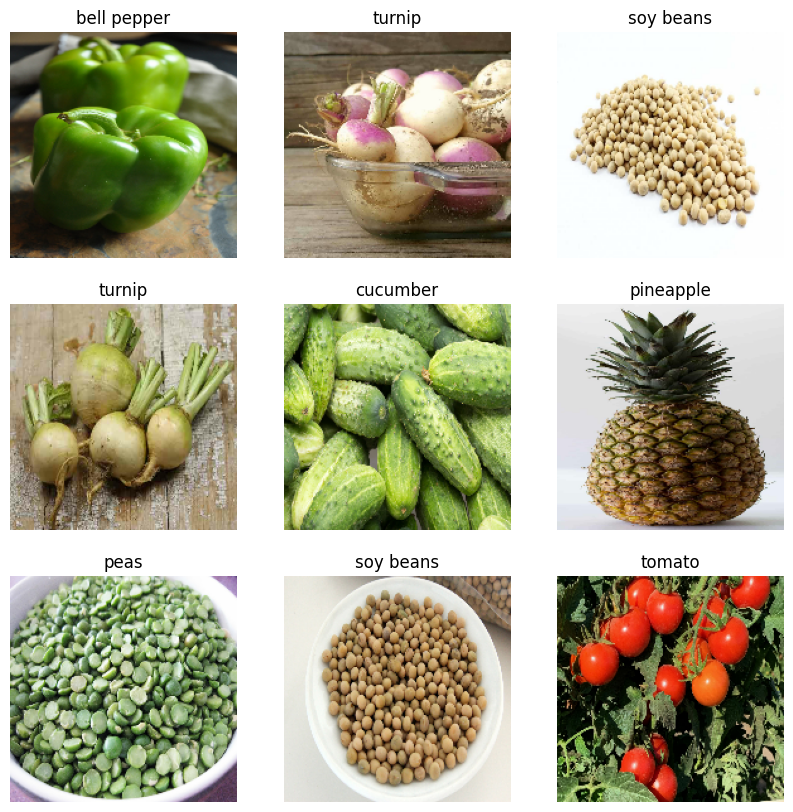

In [ ]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [26]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 71s 696ms/step - loss: 3.2293 - accuracy: 0.1457 - val_loss: 2.3146 - val_accuracy: 0.3333
Epoch 2/25
98/98 [==============================] - 66s 655ms/step - loss: 2.2877 - accuracy: 0.3400 - val_loss: 1.4481 - val_accuracy: 0.6239
Epoch 3/25
98/98 [==============================] - 67s 660ms/step - loss: 1.7366 - accuracy: 0.4918 - val_loss: 0.8957 - val_accuracy: 0.7977
Epoch 4/25
98/98 [==============================] - 68s 676ms/step - loss: 1.1745 - accuracy: 0.6575 - val_loss: 0.5715 - val_accuracy: 0.8860
Epoch 5/25
98/98 [==============================] - 67s 671ms/step - loss: 0.6198 - accuracy: 0.8180 - val_loss: 0.4808 - val_accuracy: 0.9088
Epoch 6/25
98/98 [==============================] - 73s 724ms/step - loss: 0.4181 - accuracy: 0.8809 - val_loss: 0.3960 - val_accuracy: 0.9259
Epoch 7/25
98/98 [==============================] - 74s 730ms/step - loss: 0.2787 - accuracy: 0.9297 - val_loss: 0.4718 - val_accuracy: 0.9516

Text(0.5, 1.0, 'Loss')

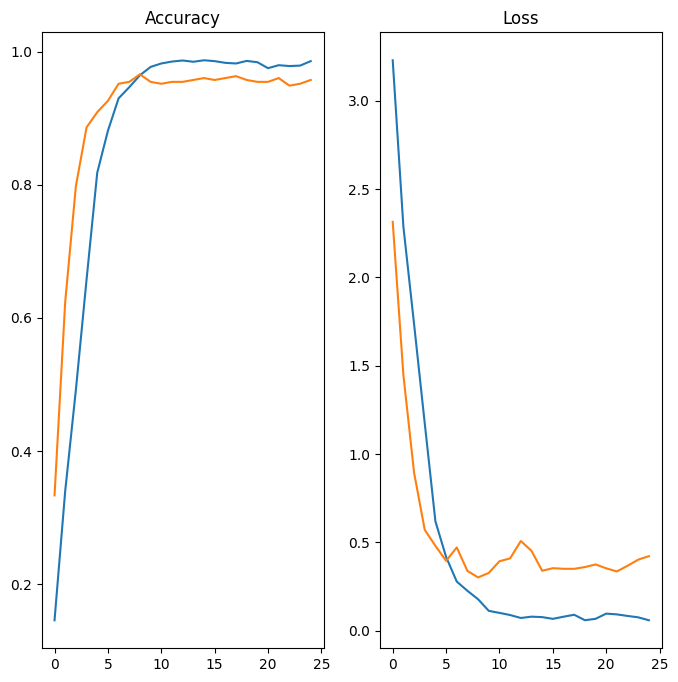

In [27]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [34]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [35]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 22ms/step


In [36]:
score=tf.nn.softmax(predict)

In [37]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 99.84


In [38]:
model.save('Image_classify.keras')